## 프로젝트 개요 
=> 대출 신청자의 정보(소득, 신용점수, 고용 상태 등)를 바탕으로 대출 승인 여부(Approval)를 예측하는 분류 모델을 구축하고, 주요 영향을 미치는 요소들을 분석함.  

---

# 데이터 준비
=> 데이터셋은 지원자의 소득(Income),신용 점수(Credit Score),대출 금액(Loan Amount),  
 부채 소득 비율(DTI Ratio), 고용여부(Employment Status) 등의 속성을 사용하여 대출 승인(Approval) 여부를 예측하는 데이터이다.

- 수행 작업  
=>불필요한 Text 열 제거  
=>one-Hot-Encoding으로 수치

 유형으로 변환(타겟 열 Employment_Status을 이진 값으로 변환)  
=> input 데이터와 target 데이터를 나누어 넘파이 배열로 만듬

In [16]:
import pandas as pd
import numpy as np

data_url="C:\\Users\\채재헌\\machine_learning\\dataset\\loan_data.csv"
loan=pd.read_csv(data_url)

In [17]:
loan.head(10)

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved
5,I need a loan to repair my car after an accident.,108236,404,50797,10.24,employed,Rejected
6,I need financial help to cover maternity and d...,110165,570,61217,7.12,employed,Approved
7,I need money to open a small bookstore and caf챕.,40656,600,21267,113.63,unemployed,Rejected
8,I need a loan to install a security system at ...,38233,346,8467,126.42,unemployed,Rejected
9,I need a loan to cover emergency expenses afte...,81024,403,19217,36.92,unemployed,Rejected


In [18]:
loan= loan.drop(columns=["Text"])
loan.head(10)

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,26556,581,8314,79.26,employed,Rejected
1,197392,389,111604,22.14,employed,Rejected
2,44561,523,34118,45.44,employed,Rejected
3,190363,729,118757,10.22,unemployed,Rejected
4,61853,732,19210,44.13,employed,Approved
5,108236,404,50797,10.24,employed,Rejected
6,110165,570,61217,7.12,employed,Approved
7,40656,600,21267,113.63,unemployed,Rejected
8,38233,346,8467,126.42,unemployed,Rejected
9,81024,403,19217,36.92,unemployed,Rejected


In [19]:
# - one-Hot Encoding으로 수치 유형으로 변환  
# 타겟 열 Employment_Status을 이진 값으로 변환
loan["Employment_Status"]=loan["Employment_Status"].map({"employed":0,"unemployed":1})


# 결과 확인
loan.head(10)

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,26556,581,8314,79.26,0,Rejected
1,197392,389,111604,22.14,0,Rejected
2,44561,523,34118,45.44,0,Rejected
3,190363,729,118757,10.22,1,Rejected
4,61853,732,19210,44.13,0,Approved
5,108236,404,50797,10.24,0,Rejected
6,110165,570,61217,7.12,0,Approved
7,40656,600,21267,113.63,1,Rejected
8,38233,346,8467,126.42,1,Rejected
9,81024,403,19217,36.92,1,Rejected


In [20]:
loan_input=loan[["Income","Credit_Score","Loan_Amount","DTI_Ratio","Employment_Status"]] ## input 데이터 설정
loan_target=loan["Approval"] # 타겟 데이터 설정

In [21]:
loan_target[:5]

0    Rejected
1    Rejected
2    Rejected
3    Rejected
4    Approved
Name: Approval, dtype: object

In [22]:
type(loan_input)

pandas.core.frame.DataFrame

In [23]:
loan_target=loan_target.to_numpy()
loan_input=loan_input.to_numpy()

In [24]:
type(loan_input)

numpy.ndarray

In [25]:
type(loan_target)

numpy.ndarray

---

# 데이터 분할

- 수행 작업  
=> 훈련데이터와 테스트 데이터로  input 값과 target 값으로 나눔

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_input,test_input,train_target,test_target=train_test_split(loan_input,loan_target,random_state=42)

---

# DecisionTreeClassifier를 사용하여 모델링


1. 수행 작업 

1) 기본 DecisionTreeClassifier로 간단한 학습 및 평가를 수행
2) 하이퍼파라미터 튜닝(GridSearchCV)을 통해 최적의 파라미터 탐색
3) 최적 모델로 테스트 데이터 예측 및 성과 지표 산출
4) 주요 성능 지표(정확도, 정밀도, 재현율, F1-score) 계산



---

### 기본 DecisionTreeClassifier로 간단한 학습 및 평가한다.

1) 기본 학습 결과

train acc: 1.0
test acc: 0.9961666666666666  

=> 기본 모델로도 높은 정확도를 보였으나, 하이퍼파라미터 튜닝을 통해 추가적인 성능 향상이 기대되었음.

In [28]:
from sklearn.tree import DecisionTreeClassifier 

dt=DecisionTreeClassifier(random_state=42)
dt.fit(train_input,train_target)

print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

1.0
0.9961666666666666


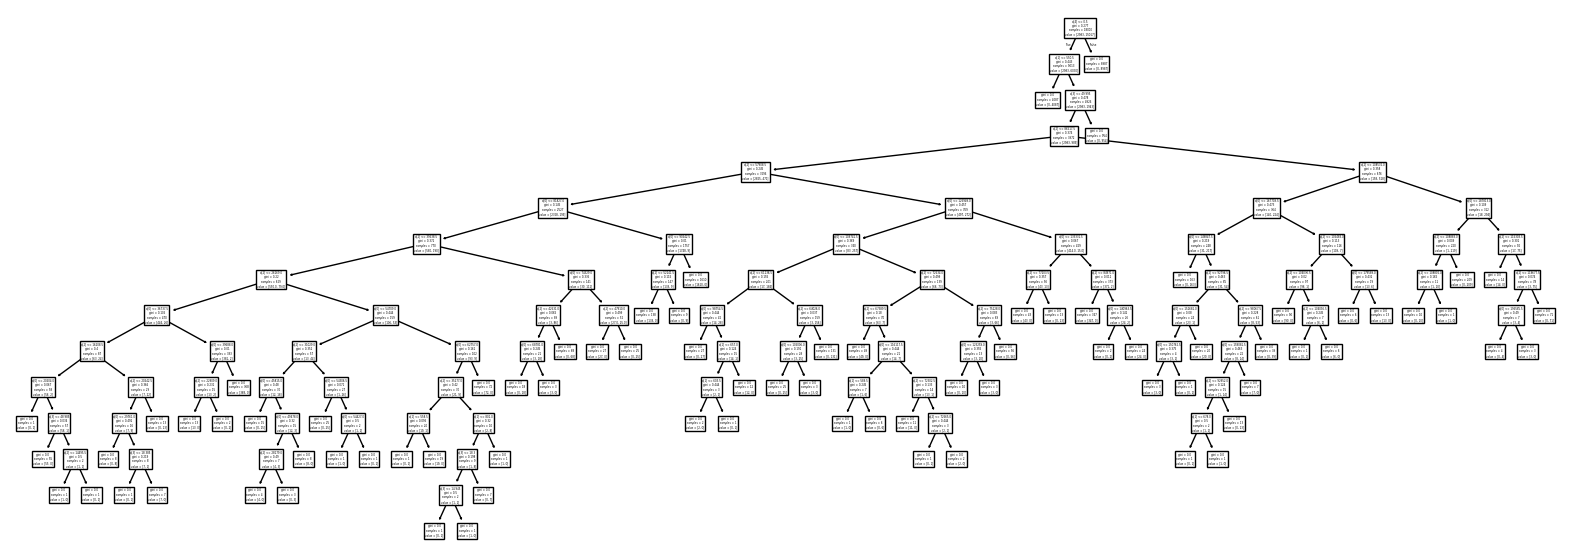

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,7)) # 그림의 크기를 조정해준다. 가로 x 세로
plot_tree(dt)
plt.show()

---

### 하이퍼파라미터 튜닝(GridSearchCV)을 통해 최적의 파라미터 탐색

2) GridSearchCV를 통한 하이퍼파라미터 튜닝 결과

* 최적 파라미터:
    * max_depth: 14
    * min_impurity_decrease: 0.0001
    * min_samples_split: 2

In [32]:
from sklearn.model_selection import GridSearchCV

params = {
    'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
    'max_depth': range(5, 20, 1),
    'min_samples_split': range(2, 100, 10)
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=1)

gs.fit(train_input, train_target)

gs.best_params_

{'max_depth': 14,
 'min_impurity_decrease': np.float64(0.0001),
 'min_samples_split': 2}

---

 ### 최적 모델로 테스트 데이터 예측 및 성과 지표 산출

 * 최고 교차검증 점수: 0.993888888888889

In [33]:
print(np.max(gs.cv_results_['mean_test_score']))

0.993888888888889


---

### 주요 성능 지표(정확도, 정밀도, 재현율, F1-score) 계산

3) 최적 모델의 테스트 성과  

    - Accuracy: 0.9953333333333333 
    - Precision: 0.99880810488677 
    - Recall: 0.9956435643564356  
    - F1 Score: 0.9972233240777469 

    => 튜닝된 모델이 테스트 데이터에서도 높은 성능을 보임


In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

pred=gs.predict(test_input)

acc=accuracy_score(test_target,pred)
precision = precision_score(test_target, pred, pos_label="Rejected")
recall = recall_score(test_target, pred, pos_label="Rejected")
f1 = f1_score(test_target, pred, pos_label="Rejected")

print("Accuracy:", acc)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)


Accuracy: 0.9953333333333333
Precision: 0.99880810488677
Recall: 0.9956435643564356
F1 Score: 0.9972233240777469


---

## 정리

## 1. 성과에 영향을 미친 주요 요소 분석  


### 1) 모델 성능 분석

  **정확도(Accuracy, 99.53%)**로 대부분의 샘플을 올바르게 예측함.  
  **정밀도(Precision, 99.8%)**와 재현율(Recall, 99.5%) 모두 높아, "Rejected" 샘플을 잘못 예측하거나 놓치는   경우가 매우 적었음.  
  **F1-Score(0.99.7%)**로, Precision과 Recall 간의 균형이 매우 우수함을 확인할 수 있음.  
  전반적으로 모델이 데이터의 패턴을 잘 학습하여 실제 업무에 적용 가능한 수준의 성능을 보임.  

### 2) 중요한 영향 요소  

* 하이퍼파라미터 튜닝:  
   GridSearchCV를 통해 최적의 파라미터 조합을 찾아 모델의 일반화 성능을 극대화함.  
* 데이터 전처리:
   불필요한 열 제거, 범주형 변수의 이진화 등으로 데이터 품질을 향상시킴.
* 특성 선택:
   주요 입력 변수(소득, 신용점수, 대출금액, DTI, 고용상태)가 대출 승인 예측에 중요한 역할을 함.   
* 클래스 불균형 대응:
  'Rejected' 클래스에 대한 평가 지표를 집중적으로 확인하여, 실제 업무에서 중요한 거절 예측의 신뢰도를 높임.   

--- 

### 2. 결론

본 프로젝트에서는 의사결정나무 기반 분류 모델과 하이퍼파라미터 튜닝을 통해 대출 승인 예측 문제를 효과적으로 해결하였다.  
모델은 높은 정확도와 F1-score를 기록하였으며, 특히 'Rejected' 클래스에 대한 정밀도와 재현율이 모두 높아 실제 금융 업무에 적용할 수 있는 신뢰도 높은 결과를 도출하였다.
하이퍼파라미터 조정, 적절한 데이터 전처리, 평가 지표의 선택이 성과 향상에 중요한 역할을 했으며, 향후 추가적인 데이터 확보와 다양한 모델 비교를 통해 성능을 더욱 개선할 수 있을것이라고 판단한다.




